# 3.9 Galenshore分布

In [1]:
import pandas as pd
import numpy as np
from scipy import special
import seaborn as sns
import warnings

sns.set_theme()
warnings.simplefilter("ignore")

Galenshore($a, \theta$)

$$
p(y) 
= \frac{2}{\Gamma(a)}
\theta ^{2a} y^{2a-1} e^{-\theta^2 y^2}
$$

## a

Galenshore分布の密度関数
$p(y)$ は指数型分布族の形 $\kappa(n_0, t_0) c(\phi)^{n_0} e^{n_0 t_0 \phi}$ で書くことができる。

$$
\begin{aligned}
h(y) &=\frac{2 y^{2a - 1}}{\Gamma{a}} \\
c(\phi) &= \theta^{2a} \\
t(y) &= y^2 \\
\phi &= - \theta^2
\end{aligned}
$$

本文p.58から、この事前分布は

$$
\begin{aligned}
p(\theta | n_0, t_0)
&= \kappa(n_0, t_0) \theta^{2a n_0} e^{- n_0 t_0 \theta^2}
\\
&= \frac{2}{\Gamma(a n_0 + 1/2)} (n_0 t_0)^{a} \theta^{2a n_0} e^{- n_0 t_0 \theta^2}
\end{aligned}
$$

となることがわかり、これはGalenshore分布 $\text{Galenshore} (a n_0 + 1/2, \sqrt{n_0 t_0})$である。

いくつかのパラメータでGalenshore分布をプロットしてみる

In [2]:
# Galenshore分布の確率密度関数


@np.vectorize
def pdf_galenshore(y, a, theta):
    return (
        (2 / special.gamma(a))
        * (theta ** (2 * a))
        * (y ** (2 * a - 1))
        * np.exp(-(theta**2) * (y**2))
    )

In [3]:
params = [
    # (a, theta)
    (1, 1),
    (1, 2),
    (2, 1),
    (2, 2),
]

df_3_9 = pd.DataFrame()
df_3_9["theta"] = np.linspace(0, 4, 100)
for a, theta in params:
    df_3_9[f"a = {a}, theta = {theta}"] = pdf_galenshore(df_3_9["theta"], a, theta)

df_3_9.head()

,theta,"a = 1, theta = 1","a = 1, theta = 2","a = 2, theta = 1","a = 2, theta = 2"
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.040404,0.080676,0.321129,0.000132,0.002097
2,0.080808,0.160564,0.629798,0.001048,0.016450
3,0.121212,0.238888,0.914351,0.003510,0.053736
4,0.161616,0.314899,1.164662,0.008225,0.121683


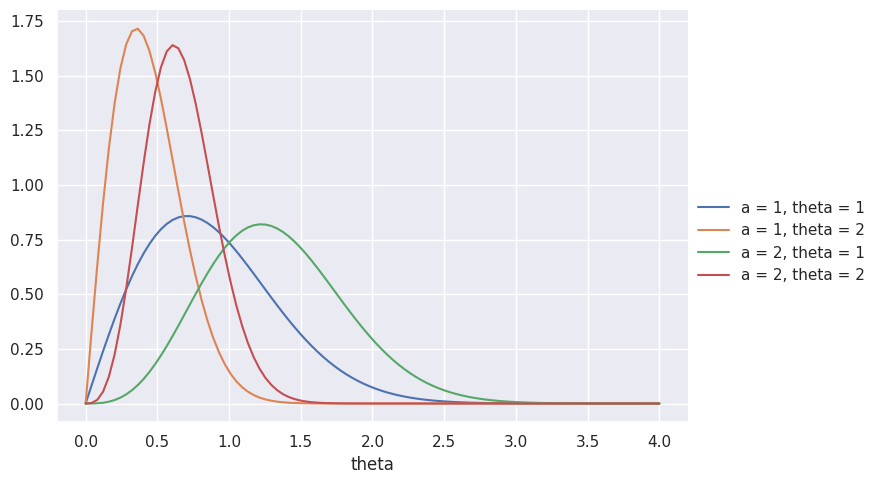

In [4]:
_ = sns.relplot(
    df_3_9.set_index("theta"),
    kind="line",
    dashes=False,
    aspect=1.5,
)

## b

本文p.53から、事後分布は $\text{Galenshore}(a(n_0 + n) + 1/2, \sqrt{n_0 t_0 + n \bar{t}})$
であり、確率密度関数は

$$
\begin{aligned}
p(\theta | y_1, \cdots, y_n)
&= p(\theta | n_0 + n, (n_0 t_0 + n \bar{t})/(n_0 + n)) \\
&= \frac{2}{\Gamma(a (n_0 + n) + 1/2)} (n_0 t_0 + n \bar{t})^{a} \theta^{2a (n_0 + n)} e^{- (n_0 t_0 + n \bar{t}) \theta^2}
\\ \\
& \qquad \text{where} \quad \bar{t} = \sum _i y^{2} _{i}
\end{aligned}
$$

となる。

## c

比を計算する。

$$
\begin{aligned}
p(\theta _a | y_1, \cdots, y_n) / p(\theta _b | y_1, \cdots, y_n)
&= \frac{
    \theta^{2a(n_0 + n)}_{a} e^{-(n_0 t_0 + n \bar{t}) \theta^{2}_{a}}
}{
    \theta^{2a(n_0 + n)}_{b} e^{-(n_0 t_0 + n \bar{t}) \theta^{2}_{b}}
} \\
&= \left( 
    \frac{\theta_{a}}{\theta_{b}}
\right) ^{2a(n_0 + n)}
\exp\left\{{-(n_0 t_0 + n \bar{t}) (\theta^{2}_{a}-\theta^{2}_{b}) }
\right\}
\end{aligned}
$$

これは $n\bar{t} = \sum_{i} y^{2}_{i}$ の関数であるから、十分統計量は $\sum_{i} y^{2}_{i}$ である。

## d

$\theta$ の事後分布は $\text{Galenshore}(a(n_0 + n) + 1/2, \sqrt{n_0 t_0 + n \bar{t}})$
であるから、

$$
E[\theta|y_1, \cdots, y_n]
= \frac{
    \Gamma \left( a(n_0 + n) + 1\right)
}{
    \Gamma \left( a(n_0 + n) + 1/2 \right)
    \sqrt{n_0 t_0 + n \bar{t}}
}
$$

となる。